In [1]:
#install the needed packages

!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5973 sha256=cb9ed6bc2a0db13001d9945a7a79d038d2438cb6ef704254b3931f94f29d0139
  Stored in directory: /root/.cache/pip/wheels/1b/02/6c/a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori


In [2]:
#install the needed packages

!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#import the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from apyori import apriori
import utils

In [4]:
#import the dataset

dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', 
                      names=['Class Name', 'handicapped-infants', 'water-project-cost-sharing',                                                                                                      
                             'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid', 
                             'religious-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 
                             'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending', 
                             'superfund-right-to-sue', 'crime', 'duty-free-exports', 
                             'export-administration-act-south-africa'])

In [5]:
#view the first few columns and the column names
#this also reveals that there are some missing values denoted by '?'

dataset.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [6]:
#assign np.nan to the missing values with'?' so we can treat them

dataset.replace('?', np.nan, inplace=True)

In [7]:
#view the dataset again after the nan has been assigned

dataset

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,NaN,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,NaN,NaN,NaN,NaN,n,y,y,y,n,y


In [8]:
#wecan now check for missing values per column

dataset.isnull().sum().sort_values(ascending=False)

export-administration-act-south-africa    104
water-project-cost-sharing                 48
education-spending                         31
duty-free-exports                          28
superfund-right-to-sue                     25
mx-missile                                 22
synfuels-corporation-cutback               21
crime                                      17
aid-to-nicaraguan-contras                  15
el-salvador-aid                            15
anti-satellite-test-ban                    14
handicapped-infants                        12
religious-groups-in-schools                11
physician-fee-freeze                       11
adoption-of-the-budget-resolution          11
immigration                                 7
Class Name                                  0
dtype: int64

In [9]:
# we will be dropping the two columns with the highest missing values

df = dataset.drop(labels='export-administration-act-south-africa', axis=1)
df

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n
432,republican,n,NaN,n,y,y,y,n,n,n,n,y,y,y,y,n
433,republican,n,n,n,y,y,y,NaN,NaN,NaN,NaN,n,y,y,y,n


In [10]:
df1 = df.drop(labels='water-project-cost-sharing', axis=1)
df1

,Class Name,handicapped-infants,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports
0,republican,n,n,y,y,y,n,n,n,y,NaN,y,y,y,n
1,republican,n,n,y,y,y,n,n,n,n,n,y,y,y,n
2,democrat,NaN,y,NaN,y,y,n,n,n,n,y,n,y,y,n
3,democrat,n,y,n,NaN,y,n,n,n,n,y,n,y,n,n
4,democrat,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,y,y,y,y,n,n,y,y,n,y,y,y,n
431,democrat,n,y,n,n,n,y,y,y,y,n,n,n,n,n
432,republican,n,n,y,y,y,n,n,n,n,y,y,y,y,n
433,republican,n,n,y,y,y,NaN,NaN,NaN,NaN,n,y,y,y,n


In [11]:
#we will now replace the remaing missing values with 'y'

dataset1 = df1.replace(np.nan, "y")

In [12]:
#view the new dataset created

dataset1

,Class Name,handicapped-infants,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports
0,republican,n,n,y,y,y,n,n,n,y,y,y,y,y,n
1,republican,n,n,y,y,y,n,n,n,n,n,y,y,y,n
2,democrat,y,y,y,y,y,n,n,n,n,y,n,y,y,n
3,democrat,n,y,n,y,y,n,n,n,n,y,n,y,n,n
4,democrat,y,y,n,y,y,n,n,n,n,y,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,y,y,y,y,n,n,y,y,n,y,y,y,n
431,democrat,n,y,n,n,n,y,y,y,y,n,n,n,n,n
432,republican,n,n,y,y,y,n,n,n,n,y,y,y,y,n
433,republican,n,n,y,y,y,y,y,y,y,n,y,y,y,n


In [13]:
#we will now split the column Class name to separate the two classes 
#and give it column names republican and democrat

dataset1['republican'] = ['y' if x == 'republican' else 'n' for x in dataset1['Class Name']]

In [14]:
dataset1['democrat'] = ['y' if x == 'democrat' else 'n' for x in dataset1['Class Name']]

In [15]:
#view the dataset after the new columns creation

dataset1

,Class Name,handicapped-infants,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,republican,democrat
0,republican,n,n,y,y,y,n,n,n,y,y,y,y,y,n,y,n
1,republican,n,n,y,y,y,n,n,n,n,n,y,y,y,n,y,n
2,democrat,y,y,y,y,y,n,n,n,n,y,n,y,y,n,n,y
3,democrat,n,y,n,y,y,n,n,n,n,y,n,y,n,n,n,y
4,democrat,y,y,n,y,y,n,n,n,n,y,y,y,y,y,n,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y,n
431,democrat,n,y,n,n,n,y,y,y,y,n,n,n,n,n,n,y
432,republican,n,n,y,y,y,n,n,n,n,y,y,y,y,n,y,n
433,republican,n,n,y,y,y,y,y,y,y,n,y,y,y,n,y,n


In [16]:
#since we have split the column into two, we do not need the classname column anymore
#we will now drop it from our dataset and create a new dataset

new_dataset = dataset1.drop('Class Name', axis=1)

In [17]:
#view the new_dataset

new_dataset

,handicapped-infants,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,republican,democrat
0,n,n,y,y,y,n,n,n,y,y,y,y,y,n,y,n
1,n,n,y,y,y,n,n,n,n,n,y,y,y,n,y,n
2,y,y,y,y,y,n,n,n,n,y,n,y,y,n,n,y
3,n,y,n,y,y,n,n,n,n,y,n,y,n,n,n,y
4,y,y,n,y,y,n,n,n,n,y,y,y,y,y,n,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y,n
431,n,y,n,n,n,y,y,y,y,n,n,n,n,n,n,y
432,n,n,y,y,y,n,n,n,n,y,y,y,y,n,y,n
433,n,n,y,y,y,y,y,y,y,n,y,y,y,n,y,n


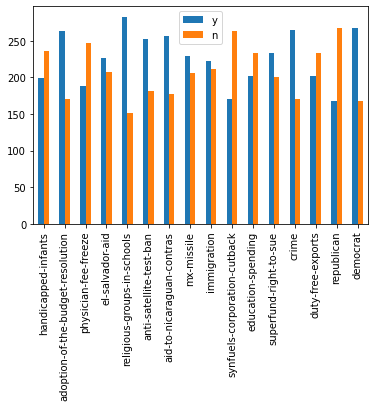

In [18]:
#we will not plot a barplot to visualise the distribution accross columns

yes = (new_dataset=='y').sum()
no = (new_dataset=='n').sum()
voters = pd.concat([yes,no],axis=1,keys=['y','n'])
ax = voters.plot.bar()
plt.show()

In [19]:
#lets create our relationship pairs

votes = [['handicapped-infants', 'water-project-cost-sharing', 'republican'],
['physician-fee-freeze', 'democrat'],
['anti-satellite-test-ban', 'mx-missile', 'democrat'],
['immigration',  'education-spending', 'republican'],
]

votes

[['handicapped-infants', 'water-project-cost-sharing', 'republican'],
 ['physician-fee-freeze', 'democrat'],
 ['anti-satellite-test-ban', 'mx-missile', 'democrat'],
 ['immigration', 'education-spending', 'republican']]

In [20]:
#using apriori, we will create a list of association rules
#by passing a lists of transactions and setting the minimum support and confidence 

Rules = list(apriori(votes, min_support=0.2, min_confidence=0.5, use_colnames=True))

In [21]:
#using the utils.extract function, we will now extract the related rules
#and corresponding support, confidence and lift

associationRules = utils.extract(Rules)
rules_df = pd.DataFrame(associationRules, columns=['LHS','RHS','Support','Confidence','Lift'])
rules_df

,LHS,RHS,Support,Confidence,Lift
0,[],[democrat],0.50,0.5,1.0
1,[],[republican],0.50,0.5,1.0
2,[anti-satellite-test-ban],[democrat],0.25,1.0,2.0
3,[democrat],[anti-satellite-test-ban],0.25,0.5,2.0
4,[anti-satellite-test-ban],[mx-missile],0.25,1.0,4.0
5,[mx-missile],[anti-satellite-test-ban],0.25,1.0,4.0
6,[democrat],[mx-missile],0.25,0.5,2.0
7,[mx-missile],[democrat],0.25,1.0,2.0
8,[democrat],[physician-fee-freeze],0.25,0.5,2.0
9,[physician-fee-freeze],[democrat],0.25,1.0,2.0


In [22]:
#lets view the rules generated

utils.inspect(associationRules)

The number of associated rules: 40
LHS: [] --> RHS:['democrat'], support: 0.50, confidence: 0.50, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['republican'], support: 0.50, confidence: 0.50, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['anti-satellite-test-ban'] --> RHS:['democrat'], support: 0.25, confidence: 1.00, lift: 2.00
--------------------------------------------------------------------------------
LHS: ['democrat'] --> RHS:['anti-satellite-test-ban'], support: 0.25, confidence: 0.50, lift: 2.00
--------------------------------------------------------------------------------
LHS: ['anti-satellite-test-ban'] --> RHS:['mx-missile'], support: 0.25, confidence: 1.00, lift: 4.00
--------------------------------------------------------------------------------
LHS: ['mx-missile'] --> RHS:['anti-satellite-test-ban'], support: 0.25, confidence: 1.00, lift: 4.00
----------

In [23]:
#we will now use the apriori algorithm to extract rules by setting the required parameters

Rules = list(apriori(votes, min_support=0.02, min_confidence=0.2, max_length=3))
associationRules = utils.extract(Rules)
rules_df = pd.DataFrame(associationRules, columns=['LHS','RHS','Support','Confidence','Lift'])
len(rules_df)

60

In [24]:
#we will now take a look at the top ten rules with the highest lift

rules_df.nlargest(10, "Lift")

,LHS,RHS,Support,Confidence,Lift
13,[anti-satellite-test-ban],[mx-missile],0.25,1.0,4.0
14,[mx-missile],[anti-satellite-test-ban],0.25,1.0,4.0
22,[education-spending],[immigration],0.25,1.0,4.0
23,[immigration],[education-spending],0.25,1.0,4.0
31,[handicapped-infants],[water-project-cost-sharing],0.25,1.0,4.0
32,[water-project-cost-sharing],[handicapped-infants],0.25,1.0,4.0
40,[anti-satellite-test-ban],"[democrat, mx-missile]",0.25,1.0,4.0
42,[mx-missile],"[anti-satellite-test-ban, democrat]",0.25,1.0,4.0
43,"[anti-satellite-test-ban, democrat]",[mx-missile],0.25,1.0,4.0
45,"[mx-missile, democrat]",[anti-satellite-test-ban],0.25,1.0,4.0


In [25]:
#top ten rules with the highest Support

rules_df.nlargest(20, "Support")

,LHS,RHS,Support,Confidence,Lift
1,[],[democrat],0.50,0.50,1.0
7,[],[republican],0.50,0.50,1.0
0,[],[anti-satellite-test-ban],0.25,0.25,1.0
2,[],[education-spending],0.25,0.25,1.0
3,[],[handicapped-infants],0.25,0.25,1.0
4,[],[immigration],0.25,0.25,1.0
5,[],[mx-missile],0.25,0.25,1.0
6,[],[physician-fee-freeze],0.25,0.25,1.0
8,[],[water-project-cost-sharing],0.25,0.25,1.0
9,[],"[anti-satellite-test-ban, democrat]",0.25,0.25,1.0


In [26]:
#top ten rules with the highest Confidence

rules_df.nlargest(10, "Confidence")

,LHS,RHS,Support,Confidence,Lift
10,[anti-satellite-test-ban],[democrat],0.25,1.0,2.0
13,[anti-satellite-test-ban],[mx-missile],0.25,1.0,4.0
14,[mx-missile],[anti-satellite-test-ban],0.25,1.0,4.0
17,[mx-missile],[democrat],0.25,1.0,2.0
20,[physician-fee-freeze],[democrat],0.25,1.0,2.0
22,[education-spending],[immigration],0.25,1.0,4.0
23,[immigration],[education-spending],0.25,1.0,4.0
25,[education-spending],[republican],0.25,1.0,2.0
28,[handicapped-infants],[republican],0.25,1.0,2.0
31,[handicapped-infants],[water-project-cost-sharing],0.25,1.0,4.0


In [27]:
#we will now use the lambda function to filter out the top ten rules with the highest confidence with t (democrat) 

rules_df[rules_df['RHS'].apply(lambda x:(len(x)>0) & ('republican' in x))].nlargest(10,'Confidence')

,LHS,RHS,Support,Confidence,Lift
25,[education-spending],[republican],0.25,1.0,2.0
28,[handicapped-infants],[republican],0.25,1.0,2.0
34,[immigration],[republican],0.25,1.0,2.0
38,[water-project-cost-sharing],[republican],0.25,1.0,2.0
47,[education-spending],"[republican, immigration]",0.25,1.0,4.0
48,[immigration],"[education-spending, republican]",0.25,1.0,4.0
50,"[education-spending, immigration]",[republican],0.25,1.0,2.0
54,[handicapped-infants],"[republican, water-project-cost-sharing]",0.25,1.0,4.0
56,[water-project-cost-sharing],"[republican, handicapped-infants]",0.25,1.0,4.0
58,"[handicapped-infants, water-project-cost-sharing]",[republican],0.25,1.0,2.0


In [28]:
#we will now use the lambda function to filter out the top ten rules with the highest confidence with s (democrat) 

rules_df[rules_df['RHS'].apply(lambda x:(len(x)>0) & ('democrat' in x))].nlargest(10,'Confidence')

,LHS,RHS,Support,Confidence,Lift
10,[anti-satellite-test-ban],[democrat],0.25,1.00,2.0
17,[mx-missile],[democrat],0.25,1.00,2.0
20,[physician-fee-freeze],[democrat],0.25,1.00,2.0
40,[anti-satellite-test-ban],"[democrat, mx-missile]",0.25,1.00,4.0
42,[mx-missile],"[anti-satellite-test-ban, democrat]",0.25,1.00,4.0
44,"[anti-satellite-test-ban, mx-missile]",[democrat],0.25,1.00,2.0
1,[],[democrat],0.50,0.50,1.0
9,[],"[anti-satellite-test-ban, democrat]",0.25,0.25,1.0
15,[],"[democrat, mx-missile]",0.25,0.25,1.0
18,[],"[physician-fee-freeze, democrat]",0.25,0.25,1.0
